In [4]:
import pandas as pd
logs = pd.read_csv('/Users/lujingyang/Downloads/arkose_labs_DS_test/arkose_labs_DS_test_logs.csv')

In [5]:
logs.head()

,category,message,solved,theme_ab,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,check answer,user submitted answer,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,loaded,game loaded,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,user,user clicked verify,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,check answer,user submitted answer,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,loaded,game loaded,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
logs.describe()

,solved,theme_ab,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,484.000000,1779.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.745868,1.382799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.435823,0.486207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
logs_data = logs.iloc[:, 0:4]

In [18]:
logs_data.head()

,category,message,solved,theme_ab
0,check answer,user submitted answer,0.0,2
1,loaded,game loaded,NaN,1
2,user,user clicked verify,NaN,2
3,check answer,user submitted answer,0.0,1
4,loaded,game loaded,NaN,1


In [19]:
logs_data['solved'].unique()

array([ 0., nan,  1.])

In [20]:
logs_data.count()

category    1779
message     1779
solved       484
theme_ab    1779
dtype: int64

In [21]:
logs_data['category'].unique()

array(['check answer', 'loaded', 'user', 'audio answer'], dtype=object)

In [67]:
logs_data['event_type']=0
for index, row in logs_data.iterrows():
    if(row['category'] == "loaded" and row['message'] == "game loaded"):
        logs_data.loc[index, 'event_type'] = 1
    elif(row['category'] == "user" and row['message'] == "user clicked verify"):
        logs_data.loc[index, 'event_type'] = 2
    elif(row['category'] == "check answer" and row['message'] == "user submitted answer" and row['solved'] == 1):
        logs_data.loc[index, 'event_type'] = 3

In [68]:
logs_data.head()

,category,message,solved,theme_ab,event_type
0,check answer,user submitted answer,0.0,2,0
1,loaded,game loaded,NaN,1,1
2,user,user clicked verify,NaN,2,2
3,check answer,user submitted answer,0.0,1,0
4,loaded,game loaded,NaN,1,1


In [69]:
logs_data[logs_data['event_type']==1].count()

category      761
message       761
solved          0
theme_ab      761
event_type    761
dtype: int64

In [70]:
logs_data[logs_data['event_type']==2].count()

category      457
message       457
solved          0
theme_ab      457
event_type    457
dtype: int64

In [71]:
logs_data[logs_data['event_type']==3].count()

category      292
message       292
solved        292
theme_ab      292
event_type    292
dtype: int64

In [72]:
theme_a_log = logs_data[logs_data['theme_ab']==1]
theme_b_log = logs_data[logs_data['theme_ab']==2]

In [73]:
theme_a_log.count()

category      1098
message       1098
solved         330
theme_ab      1098
event_type    1098
dtype: int64

In [74]:
theme_b_log.count()

category      681
message       681
solved        154
theme_ab      681
event_type    681
dtype: int64

In [75]:
logs_data.groupby(['theme_ab', 'event_type']).count()

category  message  solved
theme_ab event_type                           
1        0                196      196     144
         1                370      370       0
         2                346      346       0
         3                186      186     186
2        0                 73       73      48
         1                391      391       0
         2                111      111       0
         3                106      106     106

In [77]:
import numpy as np
a = theme_a_log.shape[0] - theme_a_log[theme_a_log['event_type'] == 0].shape[0]
b = theme_b_log.shape[0] - theme_b_log[theme_b_log['event_type'] == 0].shape[0]
print(a, b)

902 608


In [78]:
theme_a_log[theme_a_log['event_type'] == 0].count()

category      196
message       196
solved        144
theme_ab      196
event_type    196
dtype: int64

In [79]:
theme_b_log[theme_b_log['event_type'] == 0].count()

category      73
message       73
solved        48
theme_ab      73
event_type    73
dtype: int64

In [48]:
completion_rate_A = 186/theme_a_log.shape[0]
completion_rate_B = 106/theme_b_log.shape[0]
print(completion_rate_A, completion_rate_B)

0.16939890710382513 0.15565345080763582


In [88]:
square_SE_A = (completion_rate_A * (1 - completion_rate_A))/theme_a_log.shape[0]
square_SE_B = (completion_rate_B * (1 - completion_rate_B))/theme_b_log.shape[0]
import cmath
z = (completion_rate_B - completion_rate_A)/cmath.sqrt(square_SE_A + square_SE_B)
print(z)

(-0.7670368903158327+0j)


In [93]:
z1 = (completion_rate_A - completion_rate_B)/(cmath.sqrt(square_SE_A + square_SE_B))
print(z1) 
# z1<<1.96, therefore the completion rates are not different obviously

(0.7670368903158327+0j)


In [49]:
items_of_A = theme_a_log.shape[0]
items_of_B = theme_b_log.shape[0]
completion_from_A = 186
completion_from_B = 106

In [50]:
alpha_prior = 1
beta_prior = 1

In [51]:
from scipy.stats import beta

In [52]:
posterior_A = beta(alpha_prior + completion_from_A, beta_prior + items_of_A - completion_from_A)
posterior_B = beta(alpha_prior + completion_from_B, beta_prior + items_of_B - completion_from_B)

In [81]:
samples = 20000
samples_posterior_A = posterior_A.rvs(samples)
samples_posterior_B = posterior_B.rvs(samples)
posterior_relative_increase = (samples_posterior_B - samples_posterior_A)/samples_posterior_B

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 3.000e+00, 8.000e+00, 4.000e+00, 8.000e+00,
        2.200e+01, 2.600e+01, 4.200e+01, 6.000e+01, 7.300e+01, 1.070e+02,
        1.330e+02, 1.630e+02, 2.280e+02, 3.030e+02, 3.590e+02, 4.550e+02,
        5.310e+02, 7.040e+02, 8.630e+02, 9.540e+02, 1.024e+03, 1.183e+03,
        1.287e+03, 1.298e+03, 1.375e+03, 1.365e+03, 1.298e+03, 1.245e+03,
        1.134e+03, 9.350e+02, 8.030e+02, 6.300e+02, 4.810e+02, 3.260e+02,
        2.260e+02, 1.430e+02, 9.900e+01, 5.500e+01, 1.700e+01, 1.100e+01,
        8.000e+00, 3.000e+00]),
 array([-0.74896387, -0.72829075, -0.70761764, -0.68694452, -0.66627141,
        -0.64559829, -0.62492517, -0.60425206, -0.58357894, -0.56290583,
        -0.54223271, -0.5215596 , -0.50088648, -0.48021337, -0.45954025,
        -0.43886714, -0.41819402, -0.39752091, -0.37684779, -0.35617467,
        -0.33550156, -0.31482844, -0.29415533, -0.27348221, -0.2528091 ,
        -0.

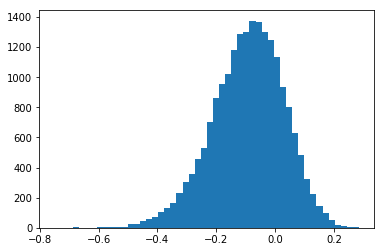

In [82]:
from matplotlib import pyplot as plt
plt.hist(posterior_relative_increase, histtype = 'stepfilled', bins=50)

In [83]:
p = (samples_posterior_B>samples_posterior_A).mean()

In [84]:
print(p)

0.22985


In [85]:
p2 = (samples_posterior_B<samples_posterior_A).mean()

In [86]:
print(p2)

0.77015


(array([2.000e+00, 0.000e+00, 2.000e+00, 6.000e+00, 1.200e+01, 2.300e+01,
        3.600e+01, 4.700e+01, 8.900e+01, 1.310e+02, 2.180e+02, 2.940e+02,
        4.350e+02, 5.090e+02, 6.480e+02, 7.750e+02, 9.190e+02, 1.042e+03,
        1.154e+03, 1.238e+03, 1.319e+03, 1.321e+03, 1.265e+03, 1.273e+03,
        1.220e+03, 1.049e+03, 1.016e+03, 8.240e+02, 7.030e+02, 5.610e+02,
        5.040e+02, 3.590e+02, 2.600e+02, 2.220e+02, 1.460e+02, 1.190e+02,
        9.800e+01, 6.100e+01, 4.000e+01, 2.400e+01, 1.400e+01, 6.000e+00,
        7.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.10592805, 0.10823502, 0.11054199, 0.11284896, 0.11515593,
        0.1174629 , 0.11976987, 0.12207684, 0.12438381, 0.12669078,
        0.12899775, 0.13130472, 0.13361169, 0.13591866, 0.13822563,
        0.1405326 , 0.14283957, 0.14514654, 0.1474535 , 0.14976047,
        0.15206744, 0.15437441, 0.15668138, 0.15898835, 0.16129532,
        0.16360229, 0.16590926, 0.16

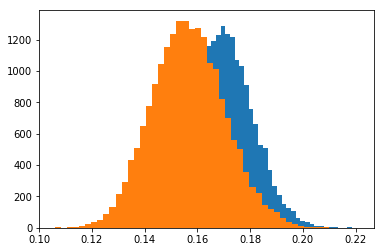

In [63]:
plt.hist(samples_posterior_A, histtype = 'stepfilled', bins=50)
plt.hist(samples_posterior_B, histtype = 'stepfilled', bins=50)